Progetto: **Classificazione di testi descrittivi per destinazione d'uso, inerenti ai beni sottoposti ad aste giudiziarie italiane.**

Studente: **Alessandro Monolo** | *10439147*

Relatore: Marco Brambilla

Referente aziendale: Simone Redaelli

Master: Data Science & Artificial Intelligence

Università: Politecnico di Milano

<hr style="border:1px solid black">

## Prima fase di Exploration Data Analysis sulle variabili numeriche & categoriche



- **1.** Distribuzione delle superfici, per destinazione d'uso;
    - **1.1** Distribuzione delle superfici, per beni **RESIDENTIAL**;
    - **1.2** Distribuzione delle superfici, per beni **RETAIL**;
    - **1.3** Distribuzione delle superfici, per beni **STORAGE**;
    - Rintracciamento di plausibili **Outliers** o **Errori** nel data frame;
    


- **2.** **Relazione tra numero vani e superficie** degli immobili per destinazione d'uso;
    - Rintracciamento di plausibili **Outliers** o **Errori** nel data frame;



- **3.** **Skew** del rapporto tra **Numero vani** e **Superficie** (*beni NO LAND*);
    - Rintracciamento di plausibili **Outliers** o **Errori** nel data frame;


- **4.** Media delle **lunghezze dei testi** descrittivi per **categoria**;
    - **4.1** **Media** per **destinazione d'uso**;
    - **4.2** **Media** per **categoria catastale**;


- **5.** **Relazione** tra **lunghezza** del **testo descrittivo** del bene e la **dimensione del bene**;
    - **5.1** Correlazione tra la lunghezza del testo descrittivo del bene e la superficie;
    - **5.2** Correlazione tra la lunghezza del testo descrittivo del bene e la superficie per destinazione d'uso;
    - **5.3** Correlazione tra la lunghezza del testo descrittivo del bene e il numero di vani;
    - **5.4** Correlazione tra la lunghezza del testo descrittivo del bene e il numero di vani per destinazione d'uso;


- **6.** **Relazione** tra la **lunghezza del testo** e la **localizzazione** del bene;
    - **6.1** **Relazione** tra la **lunghezza del test**o ed il **tribunale** di assegnazione del bene;
    - **6.2** **Relazione** tra la **lunghezza del testo** e la relativa **provincia** di ubicazione;



- **7.** **Elimino** gli **outliers** individuati;


- **8.** **Conclusioni**;


- **9.** Trasformo il **numero dei vani** per la destinazione d'uso **LAND** in quanto non possono presentare questo tipo di dato questi beni;


- **10.** **Elimino** le **colonne** dal data frame che non servono;


- **11.** **Export** del data frame in **file CSV**;

<hr style="border:1px solid black">

**Importo le librerie che mi servono:**

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
import math
import plotly.express as px
import warnings
from matplotlib import cm
from sklearn.metrics import r2_score

#### Set pandas options:

In [2]:
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 1000
pd.options.display.float_format = '{:.6f}'.format

**Importo file CSV**

In [3]:
df = pd.read_csv("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Dataset\\6_Dataset_EDA_Pre_Bilanciamento\\Dataset_EDA_Pre_Bilanciamento.csv",
                 dtype={'Numero_Lotto' : 'Int64'})

## EDA del data frame ottenuto, inerente alle variabili numeriche e categoriche

In [4]:
# Importo lo scaler che mi serve per standardizzare le caratteristiche dei campi numerici,
# rimuovendo la media e ridimensionandole alla varianza unitaria:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
# Creo una nuova colonna mappata dai valori della superfice scalata con StandardScaler:
df["Superficie_Norm"] = scaler.fit_transform(df[["Superficie"]])

### 1 - Distribuzione della superficie dei beni per destinazione d'uso

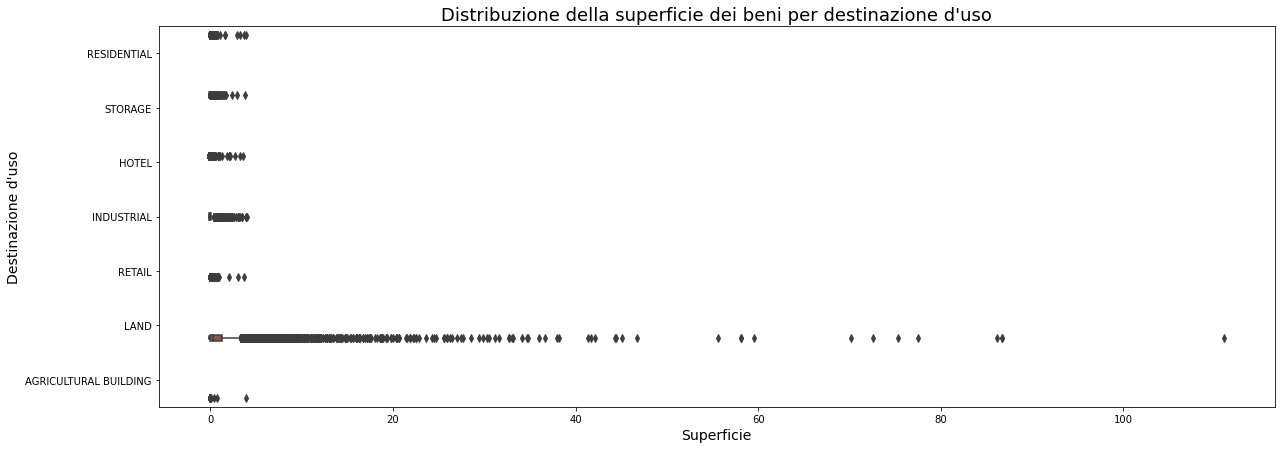

In [7]:
# Creo il boxplot per mostrare la distribuzione dei valori dei beni per destinazione d'uso:
plt.figure(figsize = (20,7))
sns.boxplot(data = df, x = df["Superficie_Norm"], y = "Destinazione_Uso", hue = "Destinazione_Uso")
plt.xlabel('Superficie', fontsize=14)
plt.ylabel("Destinazione d'uso", fontsize=14)
plt.title("Distribuzione della superficie dei beni per destinazione d'uso", fontsize=18)

plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici\\Distribuzione della superficie dei beni per destinazione d'uso.jpg", 
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.legend('', frameon=False)
plt.show()

- I beni che mostrano una **superficie più estesa** sono quelli con destinazione d'uso **LAND**;
    - I beni LAND mostrano una superfice che si protrae oltre 100 (come valore standardizzato), solo in un caso;
- I beni con destinazione d'uso **AGRICULTURAL BUILDING** invece sono i beni che mostrano una **superficie più piccola**, stando intorno allo 0, e solo uno che è oltre il cluster principale.
- I **restanti beni** invece presentano una **distribuzione** dei valori delle relative superfici **simile** tra di essi.

In [7]:
# Seleziono in un nuovo sub-df solo i beni che presentano un valore estremo nella colonna Superficie_Norm:
df_largest = df[df['Superficie_Norm'] > 60]
# Mostro il sub-df appena creato per esaminarne i dati estratti:
df_largest[['Comune', 'Provincia', 'Superficie', 'Superficie_Norm']]

,Comune,Provincia,Superficie,Superficie_Norm
18158,LESMO,MB,177916.500000,72.606382
83563,PRESENZANO,CE,212392.000000,86.695193
107308,CERIGNOLA,FG,211005.000000,86.128380
116616,MOTTOLA,TA,189985.000000,77.538314
126294,CERZETO,CS,171872.000000,70.136227
151198,SIRACUSA,SR,184652.000000,75.358922
151208,SIRACUSA,SR,271900.000000,111.013825
153254,CALANGIANUS,OT,212298.000000,86.656779


**1.1 - Distribuzione della superficie dei beni con destinazione d'uso pari a RESIDENTIAL**
- E' necessario effettuare una ricerca sulla distribuzione della superficie relativa ai beni **RESIDENTIAL** in quanto sono quelli che rappresentano la maggior parte del data frame, circa il **80% del totale**.

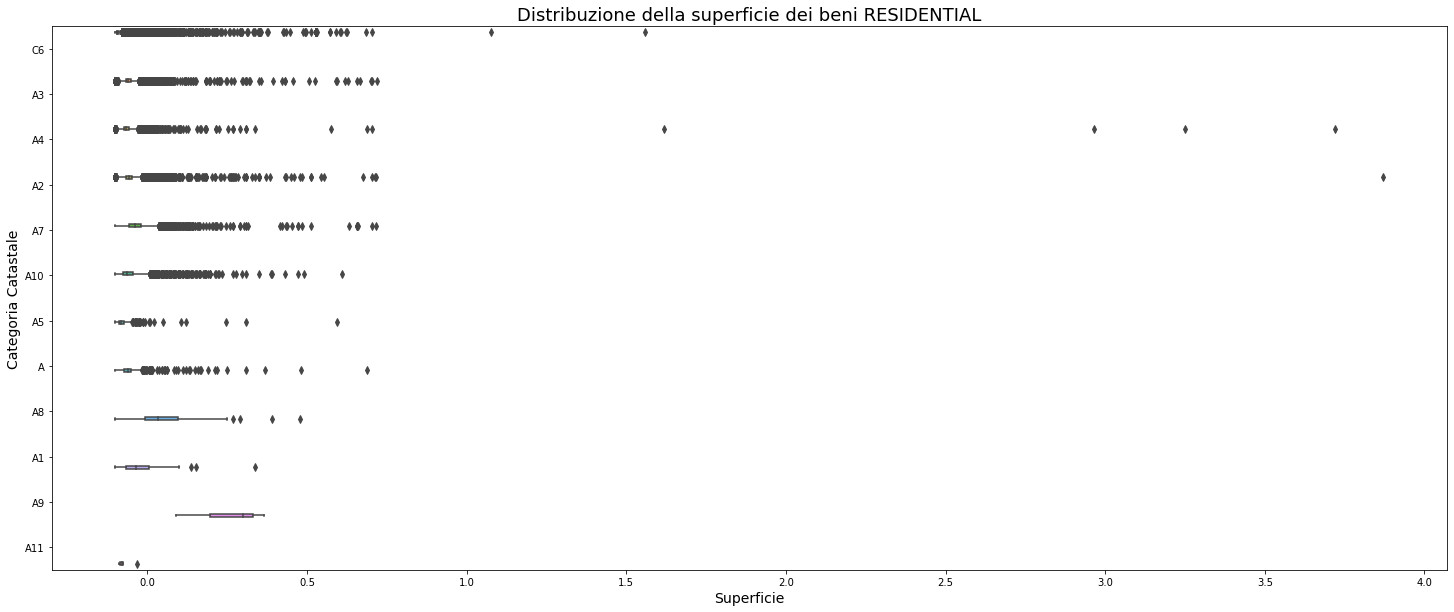

In [8]:
# Seleziono in un nuovo sub-df solo i beni che presentano valore RESIDENTIAL nella colonna Destinazione d'suo:
df_residential = df[df['Destinazione_Uso'] == "RESIDENTIAL"]

# Mostro la distribuzione delle superfici con un boxplot per la sola destinazione d'uso RESIDENTIAL:
plt.figure(figsize = (25,10))
sns.boxplot(data = df_residential, x = df_residential["Superficie_Norm"], y = "Categoria_Catastale", hue = "Categoria_Catastale")
plt.xlabel('Superficie', fontsize=14)
plt.ylabel("Categoria Catastale", fontsize=14)
plt.title("Distribuzione della superficie dei beni RESIDENTIAL", fontsize=18)
plt.legend('', frameon=False)

plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici\\Distribuzione della superficie dei beni RESIDENTIAL.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.show()

- Le categorie catastali **C6** (Box), **A2** (Abitazioni di tipo civile) & **A4** (Abitazioni di tipo popolare), mostrano chiaramente **alcuni outliers**, essendo le uniche tre categorie che hanno superfici **oltre i 1.0** (come valore standardizzato).

In [9]:
# Seleziono in un nuovo sub-df solo i beni che presentano un valore estremo nella colonna Superficie_Norm:
df_largest_res = df_residential[df_residential['Superficie_Norm'] > 1]
# Mostro il sub-df appena creato per esaminarne i dati estratti:
df_largest_res[['Comune', 'Provincia', 'Superficie', 'Superficie_Norm']]

,Comune,Provincia,Superficie,Superficie_Norm
12061,PONZONE,AL,4210.000000,1.619215
18462,SUISIO,BG,8200.000000,3.249774
52051,RAVENNA,RA,9721.000000,3.871349
60067,PONSACCO,PI,9351.000000,3.720144
74038,ROMA,RM,4061.000000,1.558324
79593,ROCCA DI PAPA,RM,7505.000000,2.965755
89415,SESSA AURUNCA,CE,2880.000000,1.075695


**1.2 - Distribuzione della superficie dei beni con destinazione d'uso pari a RETAIL**:
- E' necessario effettuare una ricerca sulla distribuzione della superficie relativa ai beni **RETAIL** in quanto presentano valori discrepati nel boxplot iniziale e quindi meritano una vista più dettagliata.

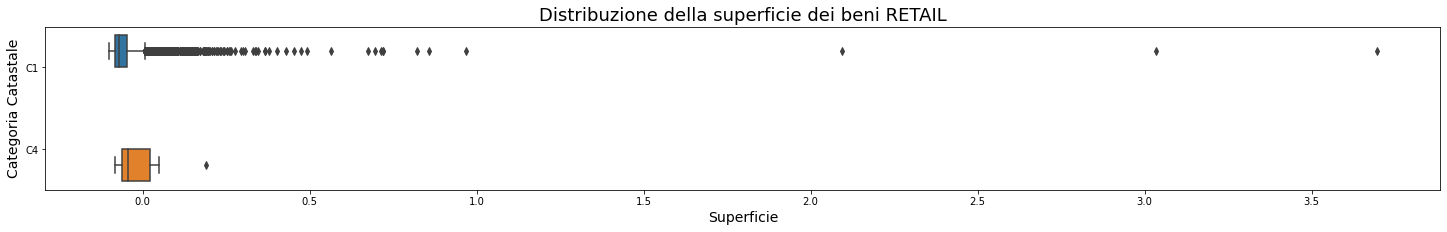

In [10]:
# Seleziono in un nuovo sub-df solo i beni che presentano valore RETAIL nella colonna Destinazione d'suo:
df_retail = df[df['Destinazione_Uso'] == "RETAIL"]

# Mostro con un altro boxplot la distribuzione delle superfici per i beni con destinazione d'uso uguale a RETAIL:
plt.figure(figsize = (25, 3))
sns.boxplot(data = df_retail, x = df_retail["Superficie_Norm"], y = "Categoria_Catastale", hue = "Categoria_Catastale")
plt.xlabel('Superficie', fontsize=14)
plt.ylabel("Categoria Catastale", fontsize=14)
plt.title("Distribuzione della superficie dei beni RETAIL", fontsize=18)
plt.legend('', frameon=False)

plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici\\Distribuzione della superficie dei beni RETAIL.jpg", 
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.show()

- Anche in questo caso la destinazione d'uso **RETAIL** presenta alcuni outliers, in particolare quelli relativi alla categoria catastale **C1** (Negozio o attività commerciale).
    - Tuttavia, **non è improbabile** trovare **negozi** con una **superficie estremamente estesa**.

In [11]:
# Seleziono in un nuovo sub-df solo i beni che presentano un valore estremo nella colonna Superficie_Norm:
df_largest_retail = df_retail[df_retail['Superficie_Norm'] > 1]
# Mostro il sub-df appena creato per esaminarne i dati estratti:
df_largest_retail[['Comune', 'Provincia', 'Superficie', 'Superficie_Norm']]

,Comune,Provincia,Superficie,Superficie_Norm
60906,CASCIANA TERME LARI,PI,5370.000000,2.093262
77057,POMEZIA,RM,7672.000000,3.034001
160189,NARBOLIA,OR,9292.000000,3.696033


**1.3 - Distribuzione della superficie dei beni con destinazione d'uso pari a STORAGE**:
- E' necessario effettuare una ricerca sulla distribuzione della superficie relativa ai beni **STORAGE** in quanto presentano valori discrepati nel boxplot iniziale e quindi meritano una vista più dettagliata.

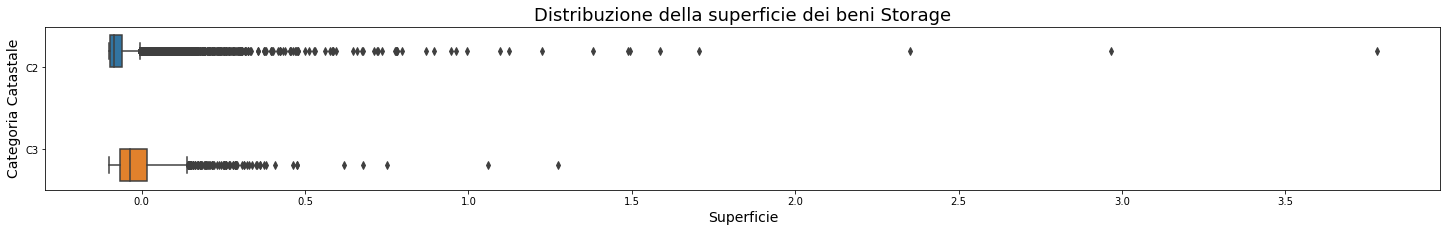

In [12]:
# Seleziono in un nuovo sub-df solo i beni che presentano valore STORAGE nella colonna Destinazione d'suo:
df_storage = df[df['Destinazione_Uso'] == "STORAGE"]

# Mostro con un altro boxplot la distribuzione delle superfici per i beni con destinazione d'uso uguale a STORAGE:
plt.figure(figsize = (25, 3))
sns.boxplot(data = df_storage, x = df_storage["Superficie_Norm"], y = "Categoria_Catastale", hue = "Categoria_Catastale")
plt.xlabel('Superficie', fontsize=14)
plt.ylabel("Categoria Catastale", fontsize=14)
plt.title("Distribuzione della superficie dei beni Storage", fontsize=18)
plt.legend('', frameon=False)

plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici\\Distribuzione della superficie dei beni Storage.jpg", 
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.show()

- Anche in questo caso sono presenti **valori discostati** dal resto delle superfici.
    - In particolare però trattanosi di categorie **C2** (Magazzini e locali di deposito) & **C3** (laboratori di artigiani), possono ritenersi corrette in quanto **plausibili**.

In [13]:
# Seleziono in un nuovo sub-df solo i beni che presentano un valore estremo nella colonna Superficie_Norm:
df_largest_sto = df_storage[df_storage['Superficie_Norm'] > 1.5]
# Mostro il sub-df appena creato per esaminarne i dati estratti:
df_largest_sto[['Comune', 'Provincia', 'Superficie', 'Superficie_Norm']]

,Comune,Provincia,Superficie,Superficie_Norm
45087,CHIOGGIA,VE,6000.000000,2.350719
137172,CACCAMO,PA,7510.000000,2.967798
144794,ACI CASTELLO,CT,9500.000000,3.781034
147313,BELPASSO,CT,4419.000000,1.704625
147314,BELPASSO,CT,4131.000000,1.586931


### 2 - Relazione tra numero di vani e superfice per i beni secondo destinazione d'uso, NO LAND:

In [14]:
# Normalizzo la colonna del numero vani con lo stesso standardScaler impiegato per la colonna delle superfici:
df["Numero_Vani_Norm"] = scaler.fit_transform(df[["Numero_Vani"]])

# Ottengo il rapporto tra numero vani del singolo bene e superficie:
df['Rapporto_Vani_Superficie'] = df["Numero_Vani"] / df["Superficie"]

# Ottengo un nuovo sub-df prendendo solo i beni che non appartengono alla destinazione d'uso in quanto essa non presenta
# il numero di vani e sono caratterizzati da superfci troppo ampie in confronto ai restanti beni.
df_no_land = df[df['Destinazione_Uso'] != "LAND"]

# E' necessario inoltre togliere tutti quei beni che presentano valori pari a 0 nei campi Superficie e Numero dei vani:
df_no_land_1 = df_no_land[(df_no_land['Superficie'] != 0) & (df_no_land['Numero_Vani'] != 0)]

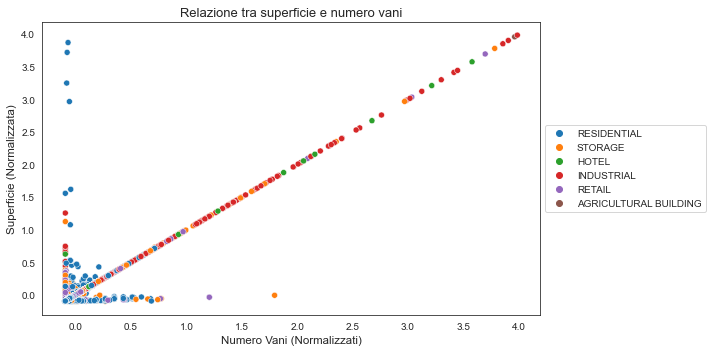

In [15]:
# Plotto la relazione tra il numero di vani e la superficie per tutti i beni con categoria non Land:
sns.set_style("white")
plt.subplots(figsize=(10, 5))
sns.scatterplot(data= df_no_land_1, x= "Numero_Vani_Norm", y= "Superficie_Norm", hue= "Destinazione_Uso")
plt.title("Relazione tra superficie e numero vani", fontsize=13)
plt.xlabel('Numero Vani (Normalizzati)',fontsize=11.5)
plt.ylabel('Superficie (Normalizzata)',fontsize=11.5)
#plt.legend(loc='lower right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici\\Relazione tra superficie e numero vani.jpg", 
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.show()

- Anche in questo caso è possibile osservare alcuni beni caratterizzati da una **relazione tra numero vani e superficie anomalo**.
- Le destinazioni d'uso che comprendono questa manciata di outliers comprendono: **RETAIL, RESIDENTIAL, STORAGE & INDUSTRIAL**.
- Dallo scatterplot si identificano **11 beni con una relazione anomala**, secondo i due parametri ad esame.

### 3 - Skew del rapporto tra Numero vani e superficie dei beni non LAND

In [16]:
# Calcolo la skew della colonna derivante dal rapporto tra superficie e numero vani:
skewness = df_no_land_1['Rapporto_Vani_Superficie'].skew()

# Stampo la skew dela rapporto vani & superficie:
print("Skew della rapporto vani & superficie normalizzati:", '\033[1m','\033[15;31;43m', round(skewness, 2), '\033[0m')

Skew della rapporto vani & superficie normalizzati:   88.57 


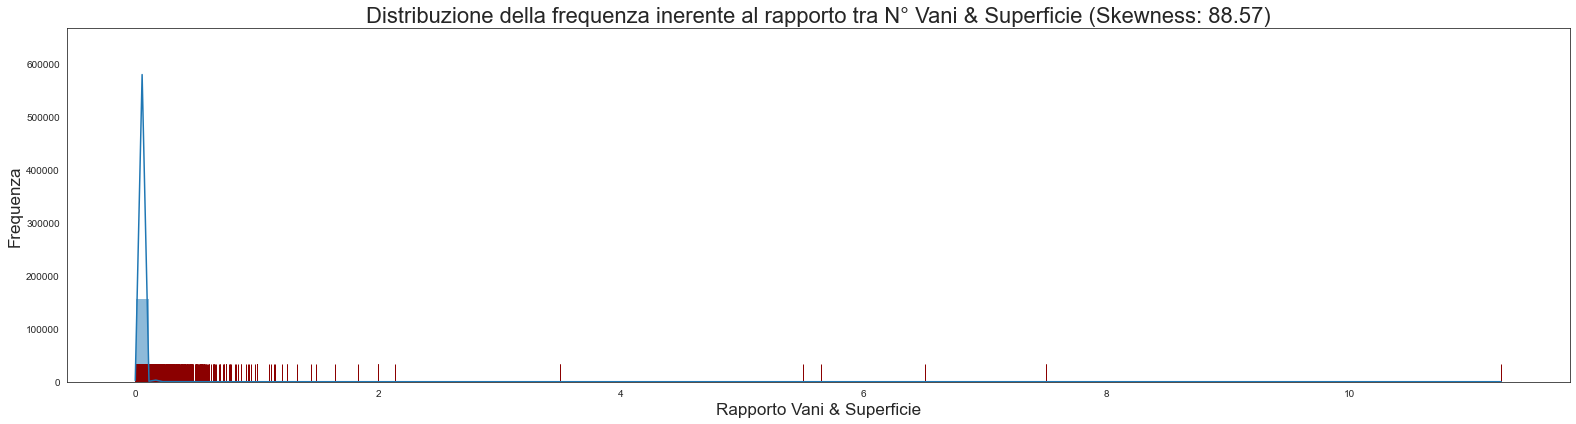

In [17]:
fig, (ax2) = plt.subplots(1, figsize=(22, 6))
# Plotto la distribuzione della frequenza del rapporto derivante dal nunero dei vani su superficie per i beni No LAND:
sns.histplot(data=df_no_land_1,
             x='Rapporto_Vani_Superficie',
             bins=100,
             kde=True,
             ax=ax2)
# Plotto i valori identificati il rapporto:
sns.rugplot(data=df_no_land_1,
            x="Rapporto_Vani_Superficie",
            height=.05,
            color="darkred")
ax2.set_title(f'Distribuzione della frequenza inerente al rapporto tra N° Vani & Superficie (Skewness: {skewness:.2f})', fontdict={'fontsize': 22})
ax2.set_xlabel('Rapporto Vani & Superficie', fontsize=17)
ax2.set_ylabel('Frequenza', fontsize=17)
plt.tight_layout()

plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici\\Distribuzione frequenza rapporto N° Vani e Superficie.jpg", 
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.show()

- Si identificano anche in questo caso **valori estremi** derivanti dal **rapporto tra numero vani e superfici** (standardizzati).
- Inoltre la **skew è positiva**, come dimostra il valore pari a **88,57**.

In [18]:
# Seleziono in un sub-df solo i beni che presentano un valore estremo nella colonna Superficie_Norm:
df_outliers_rapporto = df_no_land_1[df_no_land_1['Rapporto_Vani_Superficie']>=2]

# Ordino il data frame ottenuto in base ai valori del rapporto:
df_outliers_rapporto_sorted = df_outliers_rapporto.copy()
df_outliers_rapporto_sorted.sort_values(by="Rapporto_Vani_Superficie", ascending=False, inplace=True)

# Mostro il sub-df appena creato per esaminarne i dati estratti:
df_outliers_rapporto_sorted[['Destinazione_Uso','Superficie','Numero_Vani','Rapporto_Vani_Superficie']]

,Destinazione_Uso,Superficie,Numero_Vani,Rapporto_Vani_Superficie
6974,STORAGE,4.000000,45.000000,11.250000
148362,RESIDENTIAL,1.000000,7.500000,7.500000
148369,RESIDENTIAL,1.000000,7.500000,7.500000
148368,RESIDENTIAL,1.000000,6.500000,6.500000
150221,RESIDENTIAL,17.000000,96.000000,5.647059
71409,RESIDENTIAL,1.000000,5.500000,5.500000
23340,RESIDENTIAL,1.000000,3.500000,3.500000
27081,RESIDENTIAL,1.000000,3.500000,3.500000
18449,RESIDENTIAL,21.000000,45.000000,2.142857
9537,RESIDENTIAL,12.000000,24.000000,2.000000


### 4 - Media della lunghezza dei testi per destinazione d'uso

**4.1 Media per Destinazione d'uso**

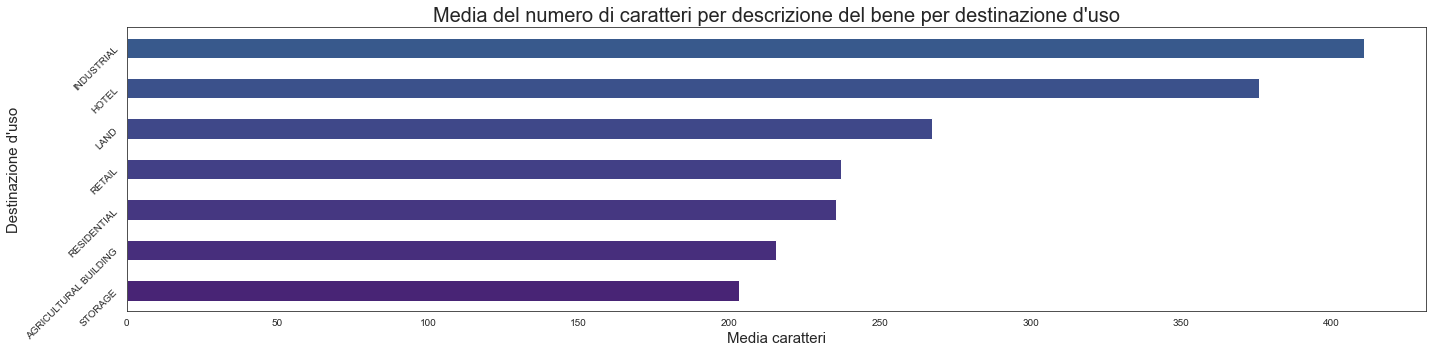

In [19]:
fig, axs = plt.subplots(figsize=(20, 5))
color = cm.viridis(np.linspace(.1, .95, 30))
df.groupby(df["Destinazione_Uso"])["N_Caratteri"].mean().sort_values(ascending=True).plot(kind='barh', rot=45, color=color)
plt.title("Media del numero di caratteri per descrizione del bene per destinazione d'uso", size=20)
plt.xlabel('Media caratteri', size=15)
plt.ylabel("Destinazione d'uso", size=15)
plt.tight_layout()

plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici\\Media del N° caratteri per descrizione del bene per destinazione d'uso.jpg", 
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.show()

- La destinazione d'uso che presenta una **media di caratteri** per testo **più alta** è quella per gli **INDUSTRIAL**;
- La destinazione d'uso che presenta una **media di caratteri** per testo **più bassa** è quella per gli **STORAGE**;
- **RETAIL** & **RESIDENTIAL** presentano una **media pressochè identica**;

**4.2 Media per categoria catastale**

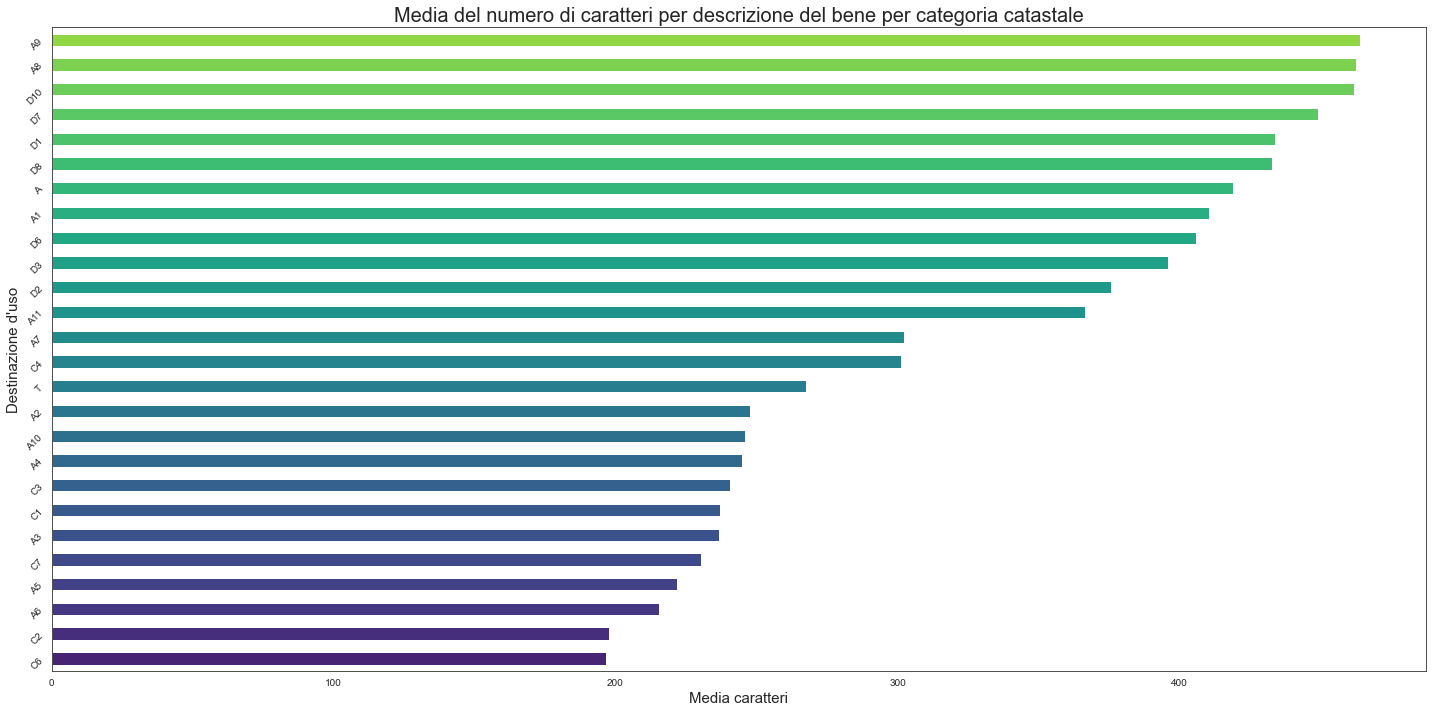

In [20]:
fig, axs = plt.subplots(figsize=(20, 10))
color = cm.viridis(np.linspace(.1, .95, 30))
df.groupby(df["Categoria_Catastale"])["N_Caratteri"].mean().sort_values(ascending=True).plot(kind='barh', rot=45, color=color)
plt.title("Media del numero di caratteri per descrizione del bene per categoria catastale", size=20)
plt.xlabel('Media caratteri', size=15)
plt.ylabel("Destinazione d'uso", size=15)
plt.tight_layout()

plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici\\Media del numero di caratteri per descrizione del bene per categoria catastale.jpg", 
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.show()

- I beni con categoria catastale **A8, A9 & D10** (Abitazione di tipo civile, Castelli, palazzi eminenti & fabbricati rurali con fini strumentali per l'agricoltura) sono quelli che presentano il **maggior numero di caratteri medi per descrizione**;
- I beni con categoria catastale **C6** (Box o Garage) sono quelli che presentano il **minor numero di caratteri medi** per descrizione.

**Conclusioni:**

- Esiste una **correlazione** tra la **tipologia** identificativa del bene e la **lunghezza della descrizione**.
- Questa **correlazione esiste sia** per la macro categoria identificativa denominata **Destinazione d'uso**, così come per la categoria specifica ovvero la **Categoria catastale**.

### 5 - Relazione tra lunghezza del testo descrittivo del bene e la dimensione del bene

**5.1 Relazione tra la lunghezza del bene e la superficie;**

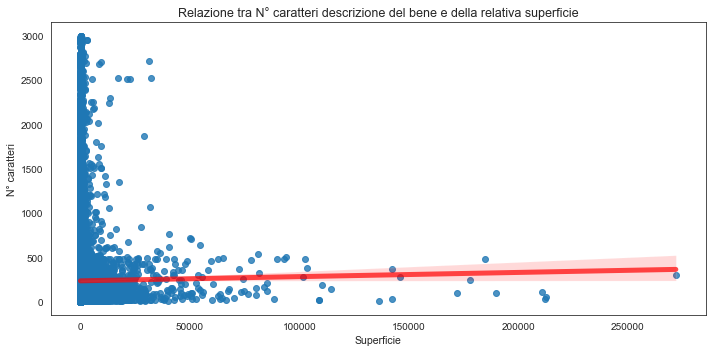

In [21]:
plt.subplots(figsize=(10, 5))
sns.regplot(x=df["Superficie"], y=df["N_Caratteri"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title("Relazione tra N° caratteri descrizione del bene e della relativa superficie", size=12.5)
plt.xlabel('Superficie', size=10.5)
plt.ylabel("N° caratteri", size=10.5)
plt.tight_layout()

plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici\\Relazione tra N° caratteri descrizione del bene e della relativa superficie.jpg", 
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.show()

- Applico un **limite ai valori sull'asse X** in quanto non è possibile definire una vera e propria correlazione, quindi necessita di una focus maggiore negli scatters concentrati **fino a 60.000 Mq** come superficie dei beni. 

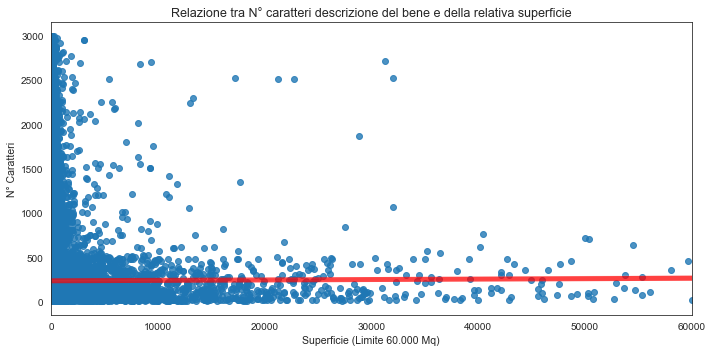

In [22]:
plt.subplots(figsize=(10, 5))
sns.regplot(x=df["Superficie"], y=df["N_Caratteri"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlim(left=-50, right=60000)
plt.title("Relazione tra N° caratteri descrizione del bene e della relativa superficie", size=12.5)
plt.xlabel('Superficie (Limite 60.000 Mq)', size=10.5)
plt.ylabel("N° Caratteri", size=10.5)

plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici\\Relazione tra N° caratteri descrizione del bene e della relativa superficie (Limite 60.000 Mq).jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})

plt.tight_layout()

In [23]:
print("La correlazione tra la superficie e il numero di caratteri è pari a: ",
      '\033[1m', '\033[15;31;43m', round(df['Superficie'].corr(df['N_Caratteri']), 3), '\033[0m')

La correlazione tra la superficie e il numero di caratteri è pari a:    0.004 


- Sembra non esserci una **evidente correlazione** tra la **superficie** con il **numero di caratteri** per le descrizione dei testi;
- E' importante però **controllare** ora **se** si tratta di una **(Non) correlazione diffusa** su tutte le destinazioni d'uso oppure su una determinata categoria di beni.

**5.2 Correlazione tra superficie e numero dei caratteri presenti nelle relative descrizioni dei beni per destinazione d'uso.**

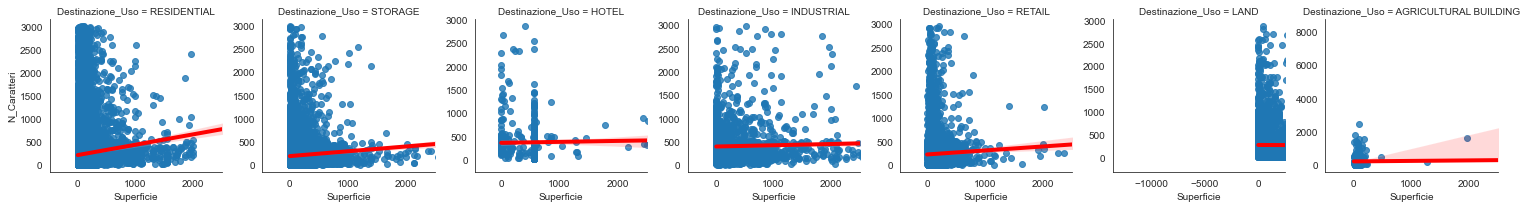

In [24]:
g = sns.FacetGrid(df, col='Destinazione_Uso', sharex=False, sharey=False)
g.map(sns.regplot, 'Superficie', 'N_Caratteri', scatter=True, line_kws={"color": "red", "alpha": 1, "lw": 4})
for ax in g.axes.flat:
    ax.set_xlim(right=2500)
plt.tight_layout()

plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici\\Relazione tra N° caratteri descrizione del bene e della relativa superficie per tipologia di bene.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})
plt.show()

- In assoluto la **correlazione più evidente** tra superfice e numero dei caratteri risulta essere per la destinazione d'uso **RESIDENTIAL**;
- Mentre una **correlazione** meno evidente  risulta essere presente per le destinazioni d'uso **RETAIL e STORAGE**;
- **LAND** invece presenta una **correlazione apparentemente negativa** tra superficie e lunghezza del testo descrittivo del bene relativo;
- Infine, per i beni relativi alle destinazioni d'uso di **AGRICULTURAL BUILDING e HOTEL e INDUSTRIAL** la **correlazione** è **quasi nulla**.

**5.3 Correlazione tra la lunghezza del testo descrittivo del bene e il numero di vani**

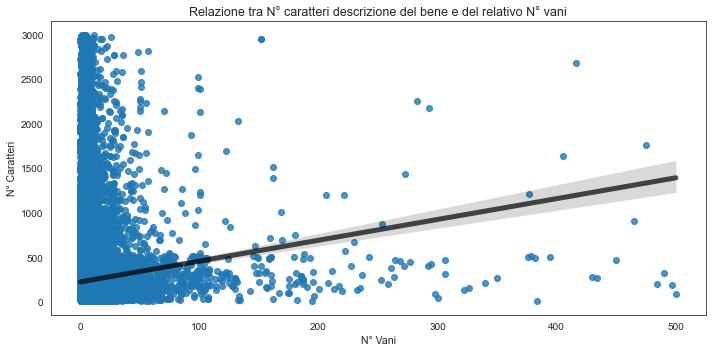

In [25]:
# Utilizzo il sub-df che non presenta beni con destinazione d'uso LAND in quanto non presentano vani
plt.subplots(figsize=(10, 5))
sns.regplot(x=df_no_land["Numero_Vani"], y=df_no_land["N_Caratteri"], line_kws={"color":"black","alpha":0.7,"lw":5})
plt.title("Relazione tra N° caratteri descrizione del bene e del relativo N° vani", size=12.5)
plt.xlabel('N° Vani', size=10.5)
plt.ylabel("N° Caratteri", size=10.5)
plt.tight_layout()

plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici\\Relazione tra N° caratteri descrizione del bene e del relativo N° vani.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})
plt.show()

- Applico un **limite ai valori sull'asse X** in quanto non è possibile definire una vera e propria correlazione, quindi necessita di una focus maggiore negli scatters concentrati **fino a 250** come numero dei vani dei beni. 

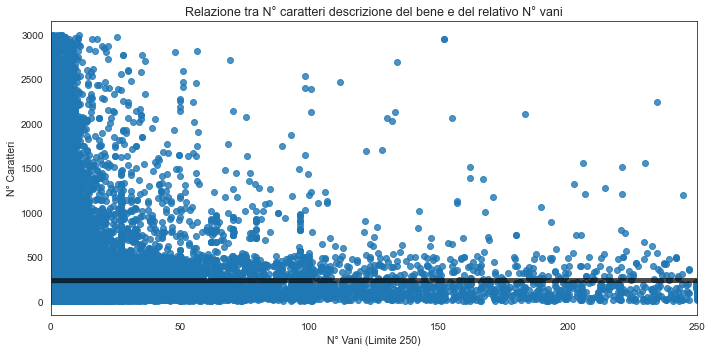

In [26]:
plt.subplots(figsize=(10, 5))
sns.regplot(x=df["Numero_Vani"], y=df["N_Caratteri"], line_kws={"color":"black","alpha":0.7,"lw":5})
plt.xlim(left=0, right=250)
plt.title("Relazione tra N° caratteri descrizione del bene e del relativo N° vani", size=12.5)
plt.xlabel('N° Vani (Limite 250)', size=10.5)
plt.ylabel("N° Caratteri", size=10.5)
plt.tight_layout()

plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici\\Relazione tra N° caratteri descrizione del bene e del relativo N° vani (Limite 250).jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})
plt.show()

In [27]:
print("La correlazione tra la superficie e il numero di caratteri è pari a: ",
      '\033[1m', '\033[15;31;43m', round(df['Numero_Vani'].corr(df['N_Caratteri']), 3), '\033[0m')

La correlazione tra la superficie e il numero di caratteri è pari a:    0.004 


- La **correlazione è assente, anche seppur sia leggermente positiva** in questo caso, per tutti i beni (tranne LAND), tra il numero di vani e il numero di caratteri;
- E' importante però controllare ora se si tratta di una correlazione diffusa su tutte le destinazioni d'uso oppure su una determinata categoria di beni.

**5.4 Correlazione tra la lunghezza del testo descrittivo del bene e il numero di vani per destinazione d'uso**

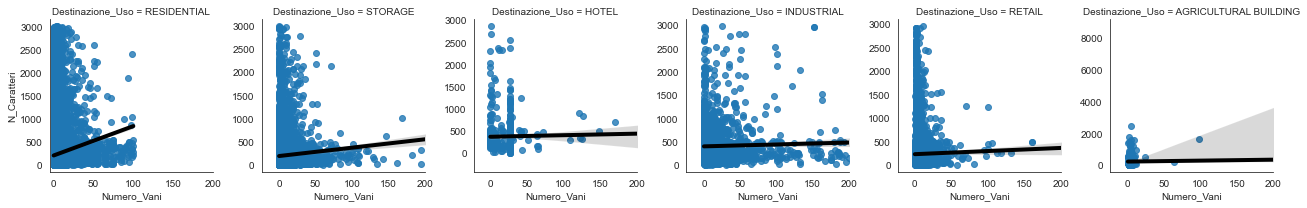

In [28]:
g = sns.FacetGrid(df_no_land, col='Destinazione_Uso', sharex=False, sharey=False)
g.map(sns.regplot, 'Numero_Vani', 'N_Caratteri', scatter=True, line_kws={"color":"black","alpha":1,"lw":4})
for ax in g.axes.flat:
    ax.set_xlim(right=200)
plt.tight_layout()

plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici\\Relazione tra N° caratteri descrizione del bene e del relativo N° vani per tipologia di bene.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})
plt.show()

- La **correlazione più marcata** è presente nei beni con destinazione d'uso **RESIDENTIAL**;
- Una **correlazione** meno marcata è mostrata per i beni con destinazione d'uso **STORAGE**;
- I beni **INDUSTRIAL, HOTEL e RETAIL** invece presentano una **correlazione nulla** e pressochè simile tra le tre destinazioni d'uso menzionate;
- Infine, i beni con destinazione d'uso **AGRICULTURAL BUILDING** è **quasi negativa**;

### 6 - Relazione tra la lunghezza del testo e la localizzazione del bene
- **6.1 Relazione tra la lunghezza del testo ed il tribunale di assegnazione del bene**

In [29]:
# Indico la media dei caratteri usati per ogni descrizone di bene:
mean_character = df['N_Caratteri'].mean()
print("Numero medio di caratteri per descrizione bene:", '\033[1m','\033[15;31;43m', int(mean_character), '\033[0m')

Numero medio di caratteri per descrizione bene:   236 


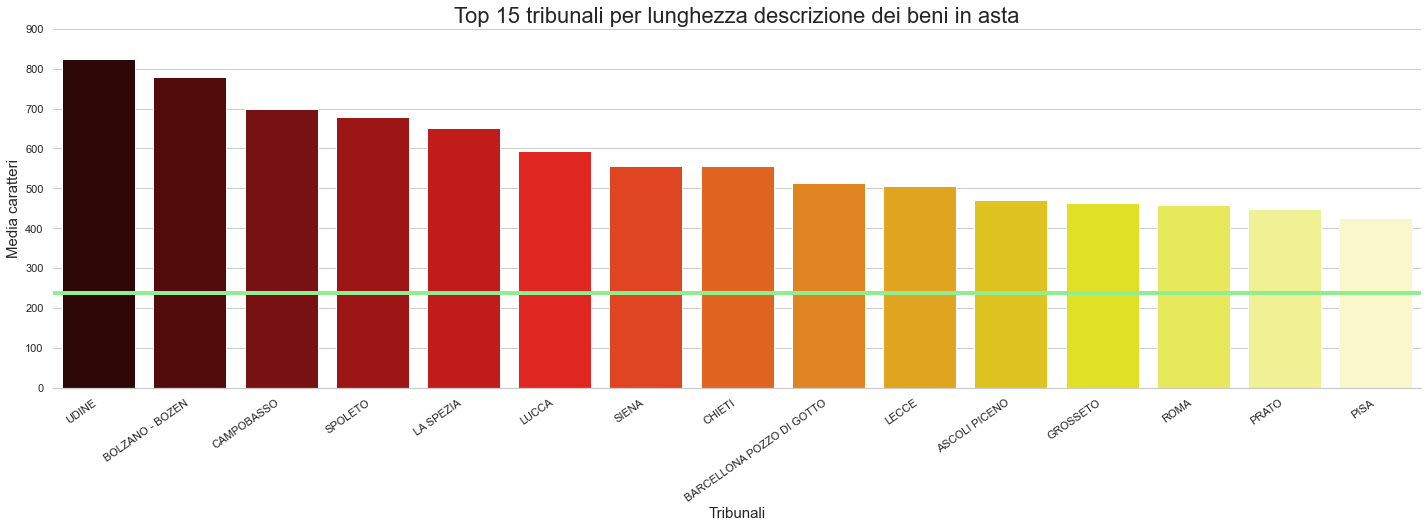

In [30]:
# Gruppo per tribunale e faccio la media del numero di caratteri per descrizione del,
# salvando in una nuova df la top 15 dei tribunali con più caratteri per descrizione:
Longest_Tribunali = df.groupby("Tribunale")["N_Caratteri"].mean().sort_values(ascending=False).head(15)

# Plotto il risultato del dataframe selezionato:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 7.5))

ax = sns.barplot(x=Longest_Tribunali.index, y=Longest_Tribunali.values, palette="hot")
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')
# Indico la media dei caratteri utilizzati per descrivere un bene:
plt.axhline(y= mean_character, color='lightgreen', linestyle='solid', label='Media', linewidth=4)
plt.title("Top 15 tribunali per lunghezza descrizione dei beni in asta", size=22)
plt.ylabel("Media caratteri", size=15)
plt.xlabel("Tribunali", size=15)
sns.despine(left=True, bottom=False, top=True, right=True)
plt.tight_layout()

plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici\\Top 15 tribunali per lunghezza descrizione dei beni in asta.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})
plt.show()

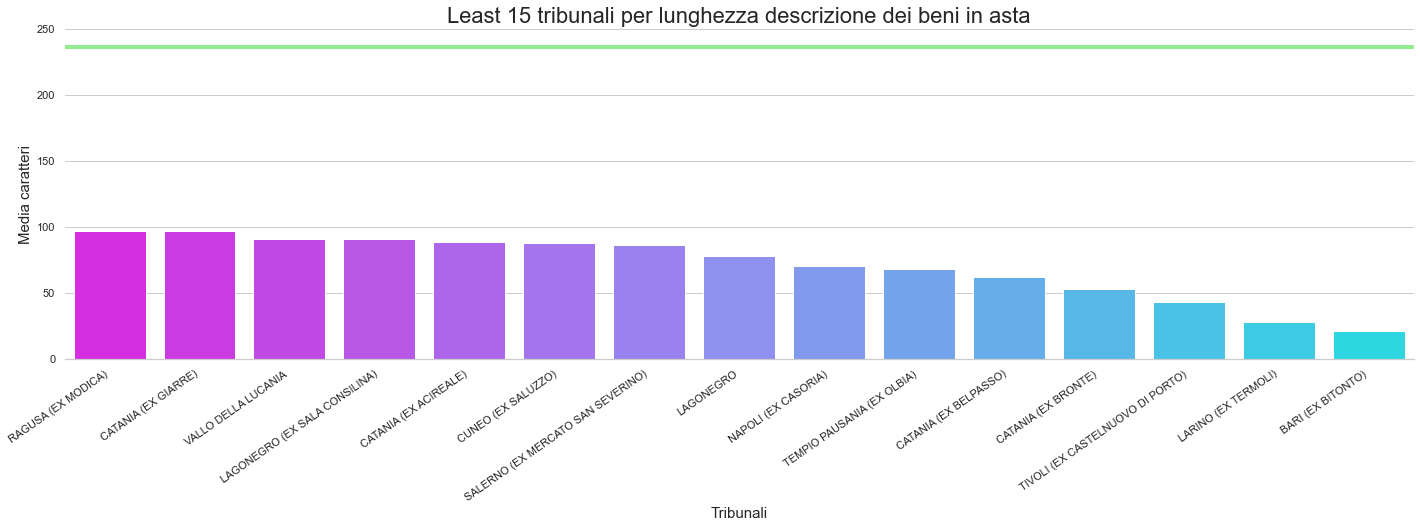

In [31]:
# Gruppo per tribunale e faccio la media del numero di caratteri per descrizione del,
# salvando in una nuova df la top 15 dei tribunali con meno caratteri per descrizione:
Shortest_Tribunali = df.groupby("Tribunale")["N_Caratteri"].mean().sort_values(ascending=False).tail(15)

# Plotto il risultato del dataframe selezionato:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 7.5))
ax = sns.barplot(x=Shortest_Tribunali.index, y=Shortest_Tribunali.values, palette="cool_r")
# Indico la media dei caratteri utilizzati per descrivere un bene:
plt.axhline(y= mean_character, color='lightgreen', linestyle='solid', label='Media', linewidth=4)
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')
plt.title("Least 15 tribunali per lunghezza descrizione dei beni in asta", size=22)
plt.ylabel("Media caratteri", size=15)
plt.xlabel("Tribunali", size=15)
sns.despine(left=True, bottom=False, top=True, right=True)
plt.tight_layout()

plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici\\Least 15 tribunali per lunghezza descrizione dei beni in asta.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})
plt.show()

- La **media dei caratteri** usati per la descrizione del bene **risulta relazionata** con il **tribunale di assegnazione**.
- Ci sono tribunali dove le **descrizioni sono più lunghe**, come **Udine, Campobasso e Bolzano, La Spezia & Spoleto** (**media caratteri > 600**);
- Ci sono trbunali invece dove le **descrizioni sono più brevi**, contando un numero di caratteri decisamente minori rispetto a prima, come Catania, **Tivoli, Bari e Larino**, tutti quanti **sotto i 50 caratteri** per descrizione.

**6.2 Relazione tra la lunghezza del testo e la relativa provincia di ubicazione**

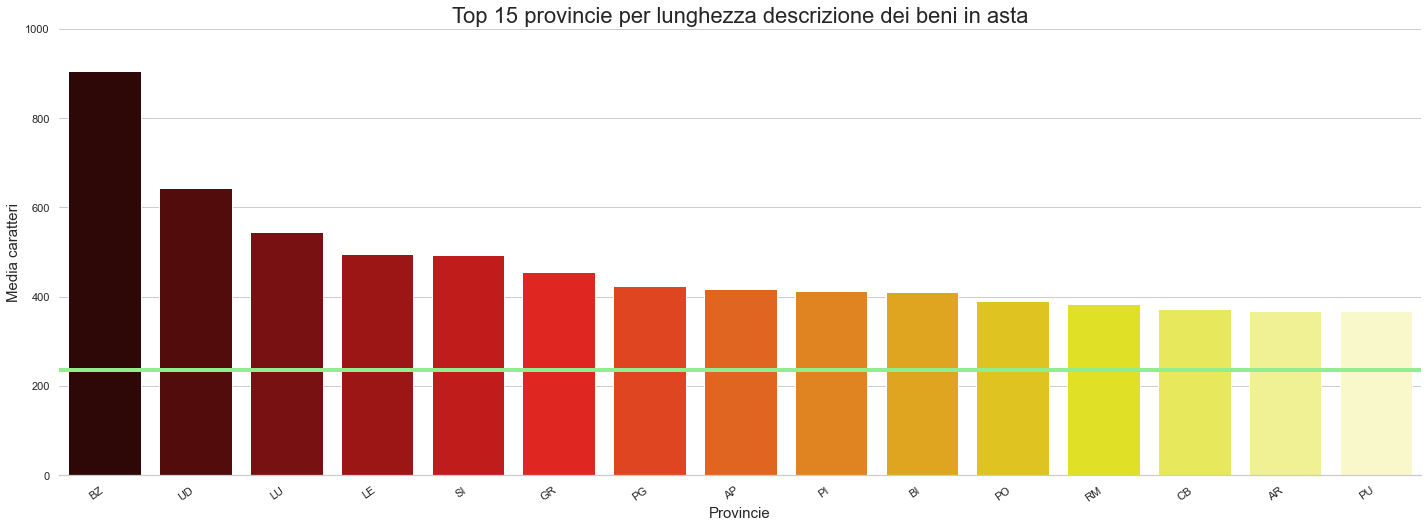

In [32]:
# Gruppo per provincia di ubicazione del bene e faccio la media del numero di caratteri per descrizione del bene,
# salvando in una nuova df la top 15 delle provincie con più caratteri per descrizione:
Longest_province = df.groupby("Provincia")["N_Caratteri"].mean().sort_values(ascending=False).head(15)

# Plotto il risultato del dataframe selezionato:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 7.5))
ax = sns.barplot(x=Longest_province.index, y=Longest_province.values, palette="hot")
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')
# Indico la media dei caratteri utilizzati per descrivere un bene:
plt.axhline(y= mean_character, color='lightgreen', linestyle='solid', label='Media', linewidth=4)
plt.title("Top 15 provincie per lunghezza descrizione dei beni in asta", size=22)
plt.ylabel("Media caratteri", size=15)
plt.xlabel("Provincie", size=15)
sns.despine(left=True, bottom=False, top=True, right=True)
plt.tight_layout()

plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici\\Top 15 provincie per lunghezza descrizione dei beni in asta.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})
plt.show()

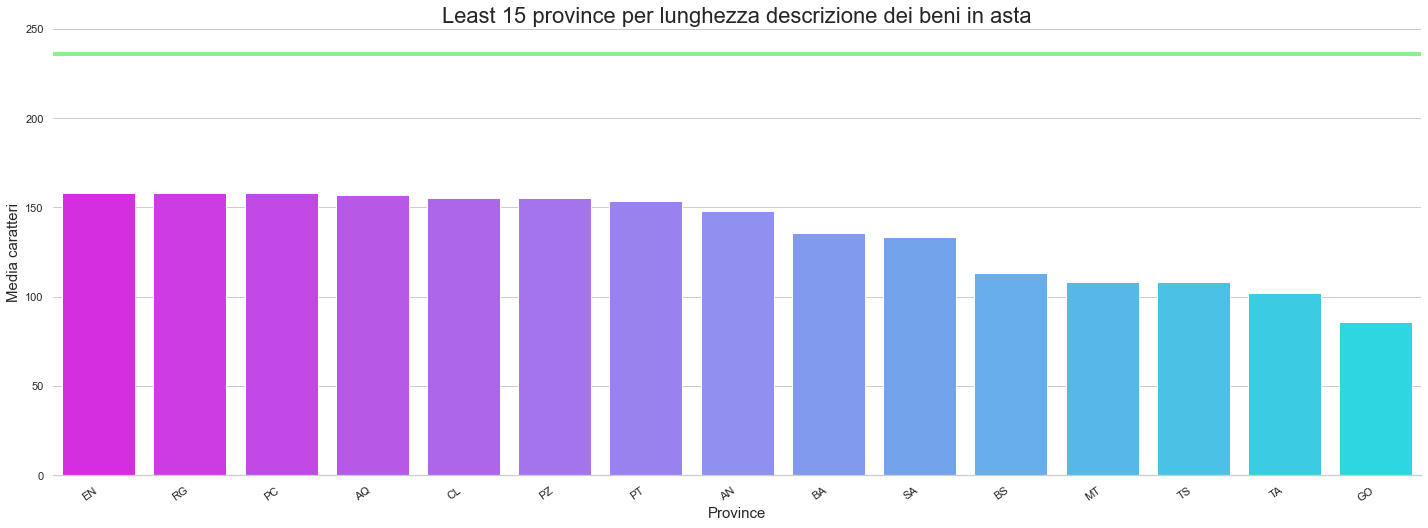

In [33]:
# Gruppo per provincia di ubicazione del bene e faccio la media del numero di caratteri per descrizione del bene,
# salvando in una nuova df la top 15 delle provincie con meno caratteri per descrizione:
Shortest_province = df.groupby("Provincia")["N_Caratteri"].mean().sort_values(ascending=False).tail(15)

# Plotto il risultato del dataframe selezionato:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 7.5))
ax = sns.barplot(x=Shortest_province.index, y=Shortest_province.values, palette="cool_r")
# Indico la media dei caratteri utilizzati per descrivere un bene:
plt.axhline(y= mean_character, color='lightgreen', linestyle='solid', label='Media', linewidth=4)
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')
plt.title("Least 15 province per lunghezza descrizione dei beni in asta", size=22)
plt.ylabel("Media caratteri", size=15)
plt.xlabel("Province", size=15)
sns.despine(left=True, bottom=False, top=True, right=True)
plt.tight_layout()

plt.savefig("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Grafici\\Least 15 province per lunghezza descrizione dei beni in asta.jpg",
            dpi=1000, facecolor='w', format='jpg', pil_kwargs={'optimize': True})
plt.show()

- Anche in questo caso esiste una **differenza tra province per numeri di caratteri per descrizione del bene**.
- Di nuovo, la **provincia**, come per i **tribunali di assegnazione**, vede **Bolzano** (con **> 600 caratteri**) al primo posto; stessa cosa per **Udine**, con circa **610 caratteri** per descrizione.
- Le **più brevi** inevce sono per le province di **Gorizia e Taranto**, entrambe **sotto (o quasi) i 100 caratteri**.

### 7. Elimino gli outliers individuati nella Exploratory Data Alysis eseguita finora

In [34]:
# Inserisco in una lista tramite la loro posizione in indice tutti gli outliers per superfice e numero vani ritrovati: 
rows_to_drop = [18158, 83563, 107308, 116616, 126294, 151198, 151208, 153254, 12061, 18462, 52051, 60067, 74038, 79593, 89415, 
                60906, 77057, 160189, 45087, 137172, 144794, 147313, 147314, 6974, 148362, 148369, 148368, 150221, 71409, 
                23340,  27081,18449, 9537, 105318, 113786]

rows_to_drop = list(set(rows_to_drop))

# Mostro il numero di outliers ritrovati:
print("Outliers individuati da eliminare dal data frame: ", 
      '\033[1m','\033[15;31;43m', len(rows_to_drop),'\033[0m')

Outliers individuati da eliminare dal data frame:    35 


In [35]:
print("Numero di beni nel data frame:", '\033[1m','\033[15;31;43m', df.shape[0],'\033[0m')
# Elimino tramite la loro posizione nell'indice gli outliers individuati:
df.drop(index=rows_to_drop, inplace=True)
# Resetto l'indice e lo riporto progressivo:
df.reset_index(drop=True, inplace=True)
print("Numero di beni nel data frame eliminando gli outliers individuati:", '\033[1m','\033[15;31;43m', df.shape[0],'\033[0m')

Numero di beni nel data frame:   166075 
Numero di beni nel data frame eliminando gli outliers individuati:   166040 


### 8 - Conclusioni

**Distribuzione** della **superficie** per **destinazione d'uso**:

- I beni che mostrano una **superficie più estesa** sono quelli con destinazione d'uso **LAND**;
    - I beni LAND mostrano una superfice che si protrae oltre 100 (come valore standardizzato), solo in un caso;
- I beni con destinazione d'uso **AGRICULTURAL BUILDING** invece sono i beni che mostrano una **superficie più piccola**, stando intorno allo 0, e solo uno che è oltre il cluster principale.
- I **restanti beni** invece presentano una **distribuzione** dei valori delle relative superfici **simile** tra di essi.
#### Nello specifico, per destinazione d'uso:
   - **RESIDENTIAL**: - Le categorie catastali **C6** (Box), **A2** (Abitazioni di tipo civile) & **A4** (Abitazioni di tipo popolare), mostrano chiaramente **alcuni outliers**, essendo le uniche tre categorie che hanno superfici **oltre i 1.0** (come valore standardizzato).
   - **RETAIL**:Anche in questo caso la destinazione d'uso **RETAIL** presenta alcuni outliers, in particolare quelli relativi alla categoria catastale **C1** (Negozio o attività commerciale).
        - Tuttavia, **non è improbabile** trovare **negozi** con una **superficie estremamente estesa**.
   - **STORAGE**: Anche in questo caso sono presenti **valori discostati** dal resto delle superfici.
        - In particolare però trattanosi di categorie **C2** (Magazzini e locali di deposito) & **C3** (laboratori di artigiani), possono ritenersi corrette in quanto **plausibili**.
        
---

**Relazione** tra **numero dei vani** e **superficie**:

 - Anche in questo caso è possibile osservare alcuni beni caratterizzati da una **relazione tra numero vani e superficie anomalo**.
- Le destinazioni d'uso che comprendono questa manciata di outliers comprendono: **RESIDENTIAL, STORAGE**.
- Dallo scatterplot si identificano **12 beni con una relazione anomala**, secondo i due parametri ad esame.
---
**Rapporto** tra **numero dei vani** e **superficie** dei beni (e relativa **skew**):
- Si identificano anche in questo caso valori estremi derivanti dal rapporto tra numero vani e superfici (standardizzati).
- Inoltre la skew è positiva e tendente verso destra, come dimostra il valore pari a **88,57**.

---

**Media** della **lunghezza dei testi** per **destinazione d'uso**:
- La destinazione d'uso che presenta una **media di caratteri** per testo **più alta** è quella per gli **INDUSTRIAL**;
- La destinazione d'uso che presenta una **media di caratteri** per testo **più bassa** è quella per gli **STORAGE**;
- **RETAIL** & **RESIDENTIAL** presentano una **media identica**;
- I beni con categoria catastale **A9, A( & D10**, sono quelli che presentano il **maggior numero di caratteri medi per descrizione**;
- I beni con categoria catastale **C6** (Box o Garage) sono quelli che presentano il **minor numero di caratteri medi** per descrizione.
- Esiste una **correlazione** tra la **tipologia** identificativa del bene e la **lunghezza della descrizione**.
- Questa **correlazione esiste sia** per la macro categoria identificativa denominata **Destinazione d'uso**, così come per la categoria specifica ovvero la **Categoria catastale**.

---

**Relazione** tra **lunghezza del testo** descrittivo del bene e la **dimensione del bene**:

- Sembra non esserci una **evidente correlazione** tra la **superficie** con il **numero di caratteri** per le descrizione dei testi. Il **valore di correlazione** tra queste due variabili è pari a **0.004**;

    - In assoluto la **correlazione più evidente** tra superfice e numero dei caratteri risulta essere per la destinazione d'uso **RESIDENTIAL**;
    - Mentre una **correlazione** meno evidente  risulta essere presente per le destinazioni d'uso **RETAIL e STORAGE**;
    - **LAND** invece presenta una **correlazione apparentemente nulla** tra superficie e lunghezza del testo descrittivo del bene relativo;
    - Infine, per i beni relativi alle destinazioni d'uso di **AGRICULTURAL BUILDING e HOTEL e INDUSTRIAL** la **correlazione** è **quasi nulla**.


- Sembra anche in questo caso non esserci una **evidente correlazione** tra il **N° dei vani** con il **N° di caratteri** per le descrizione dei testi. Il **valore di correlazione** tra queste due variabili è pari a **0.004**;

    - La **correlazione più marcata** è presente nei beni con destinazione d'uso **RESIDENTIAL**;
    - Una **correlazione** meno marcata è mostrata per i beni con destinazione d'uso **STORAGE**;
    - I beni **INDUSTRIAL, HOTEL e RETAIL** invece presentano una **correlazione nulla** e pressochè simile tra le tre destinazioni d'uso menzionate;
    - Infine, i beni con destinazione d'uso **AGRICULTURAL BUILDING** è **quasi negativa**;

---

**Relazione** tra la **lunghezza del testo** ed il **tribunale** di assegnazione del bene:
- La **media dei caratteri** usati per la descrizione del bene **risulta relazionata** con il **tribunale di assegnazione**.
- Ci sono tribunali dove le **descrizioni sono più lunghe**, come **Campobasso, Spoleto, La Spezia, Udine e Bolzano** (**media caratteri > 600**);
- Ci sono trbunali invece dove le **descrizioni sono più brevi**, contando un numero di caratteri decisamente minori rispetto a prima, come Catania, **Tivoli, Bari e Larino**, tutti quanti **sotto i 60 caratteri** per descrizione.

---

**Relazione** tra la **lunghezza del testo** e la relativa **provincia** di ubicazione:

- Anche in questo caso esiste una **differenza tra province per numeri di caratteri per descrizione del bene**.
- Di nuovo, la **provincia**, come per i **tribunali di assegnazione**, vedi **Bolzano** (con **> 800 caratteri**) al primo posto; stessa cosa per **Udine**, con circa **610 caratteri** per descrizione.
- Le **più brevi** inevce sono per le province di **Gorizia e Taranto**, entrambe **sotto (o quasi) i 100 caratteri**.

### 9 - Trasformo il numero dei vani per i beni LAND in 0

In [36]:
# Mappo tutti i valori nel campo Numero Vani per tutti i beni land come 0:
df.loc[df['Destinazione_Uso'] == "LAND", 'Numero_Vani'] = 0

# Eseguo un check per confermare la modifica appena fatta:
df_land = df[df["Destinazione_Uso"] == "LAND"]
value_counts = df_land['Numero_Vani'].value_counts()
print("Numero di beni con categoria land, con numero vani uguale a 0:",
      '\033[1m','\033[15;31;43m', value_counts[0], '\033[0m')

# Eseguo un ulteriore check per vedere se ci sono beni land con entrambi 0 sia nel campo superficie che nel campo numero vani:
df_land_0 = df[(df["Superficie"] == 0) & (df["Numero_Vani"] == 0)]
print("Numero di beni con categoria land, con numero vani e superficie uguale a 0:",
      '\033[1m','\033[15;31;43m', df_land_0.shape[0], '\033[0m')

Numero di beni con categoria land, con numero vani uguale a 0:   5804 
Numero di beni con categoria land, con numero vani e superficie uguale a 0:   0 


### 10 - Elimino le colonne che non servono dal data frame

In [37]:
# Creo una lista con all'interno le colonne che non mi serve mantenere:
columns_to_drop = ['Superficie_Norm',
                   'Numero_Vani_Norm']

# Elimino le colonne dal data frame tramite la lista creata sopra:
df.drop(columns=columns_to_drop, inplace=True)

# Mostro le colonne rimaste dopo il drop:
df.columns

Index(['Destinazione_Uso', 'Categoria_Catastale', 'Tribunale', 'Provincia',
       'Comune', 'Numero_Lotto', 'Numero_Vani', 'Superficie',
       'Catasto_Fabbricati', 'Descrizione_Bene', 'N_Caratteri',
       'Rapporto_Vani_Superficie'],
      dtype='object')

### 11 - Export del data frame in formato CSV

In [38]:
df_csv = df.to_csv("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Dataset\\7_Dataset_EDA_Pre_Bilanciamento\\Dataset_EDA_Testi.csv",
                   index=False)